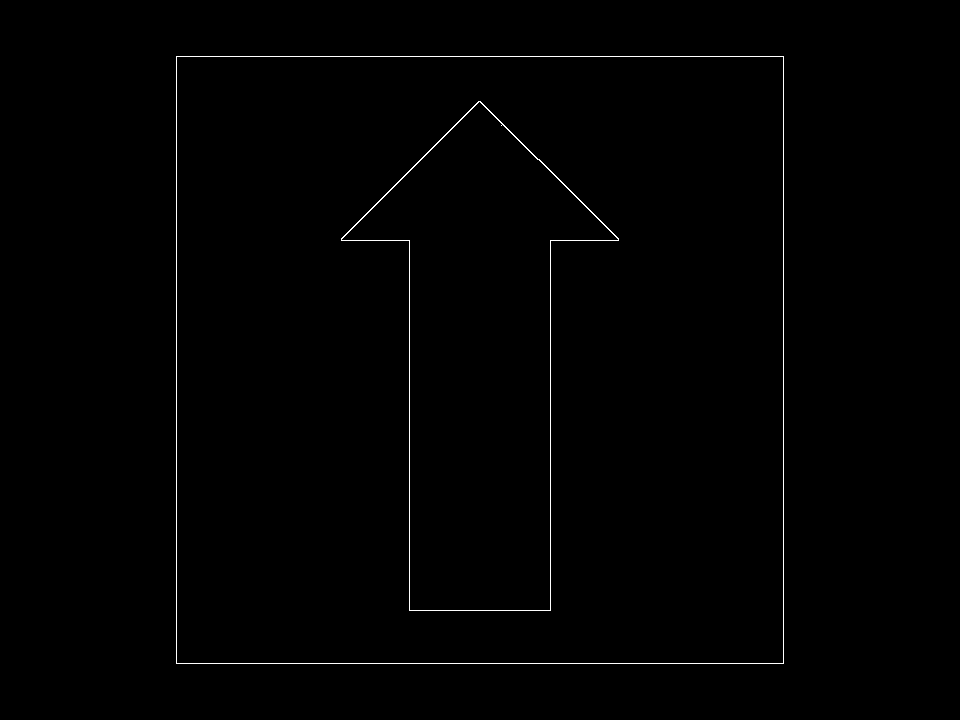

-1

In [ ]:
import cv2, numpy as np, argparse
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Marathon Markers Forward.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray,50,150,apertureSize = 3)
# result = cv2.bitwise_and(edges,edges,mask = erosion)
cv2_imshow( edges)
cv2.waitKey(0)



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


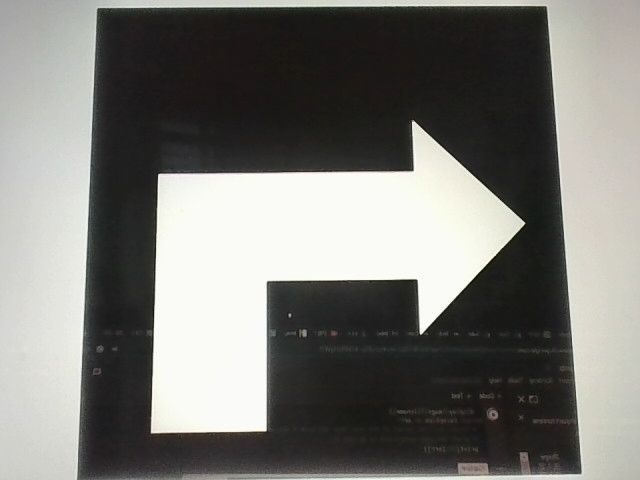

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

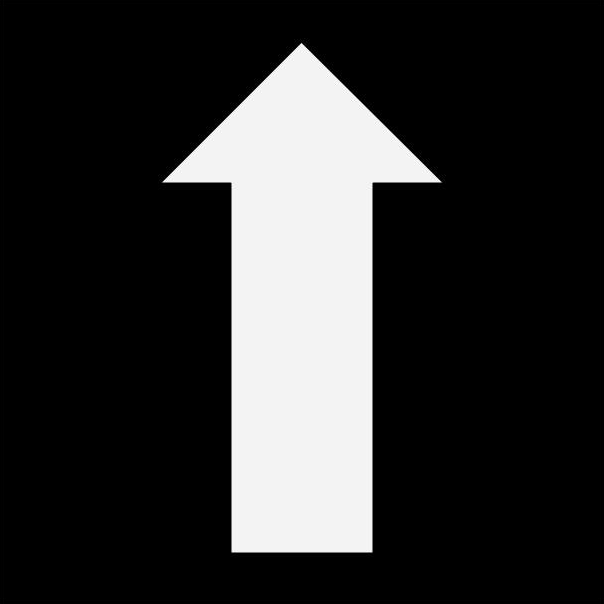

-1

In [ ]:

image =cv2.imread("/content/Marathon Markers Forward.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(gray, 50, 150)


cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)


for c in cnts:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:

        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

x, y, w, h = cv2.boundingRect(c)
cropped_image = image[y+2:y+h-2, x+2:x+w-2]
cv2_imshow(cropped_image)
# img=cv2.Canny(cropped_image,50,150)
# cv2_imshow(img)
cv2.waitKey(0)
# cv2_imshow( cropped_image)



In [ ]:

_,thresh = cv2.threshold(cropped_image, 45, 255, cv2.THRESH_BINARY)


In [ ]:
contours, _= cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

error: ignored

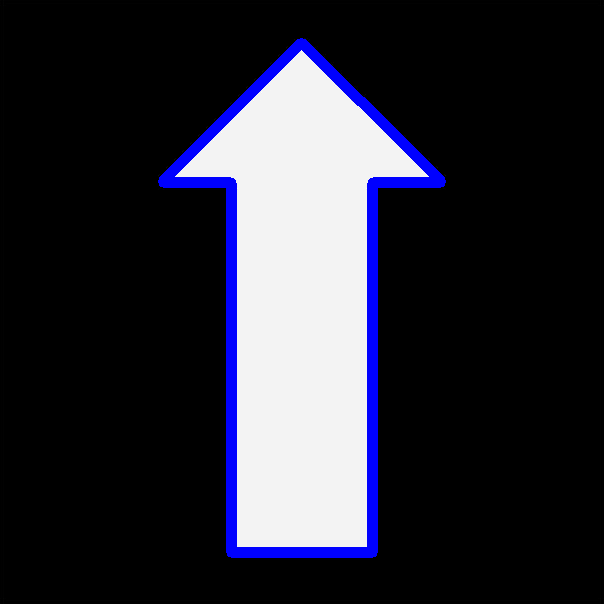

In [ ]:
import cv2


image= cropped_image
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


cv2.destroyAllWindows()


def get_contour_areas(contours):

    all_areas= []

    for cnt in contours:
        area= cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)


largest_item= sorted_contours[0]

cv2.drawContours(original_image, largest_item, -1, (255,0,0),10)
cv2.waitKey(0)
cv2_imshow( original_image)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
font = cv2.FONT_HERSHEY_COMPLEX

image=cv2.imread('/content/Marathon Markers Forward.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thresh=cv2.threshold(gray,110,255,cv2.THRESH_BINARY)

contours, _= cv2.findContours(thresh, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
# for cnt in contours :
for cnt in contours :

    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)


    cv2.drawContours(image, [approx], 0, (0, 0, 255), 5)


    n = approx.ravel()
    i = 0

    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]


            string = str(x) + " " + str(y)

            if(i == 0):

                cv2.putText(image, "Arrow tip"+" "+string, (x, y),
                                font, 0.5, (255, 0, 0))
            else:

                cv2.putText(image, string, (x, y),
                          font, 0.5, (0, 255, 0))
        i = i + 1

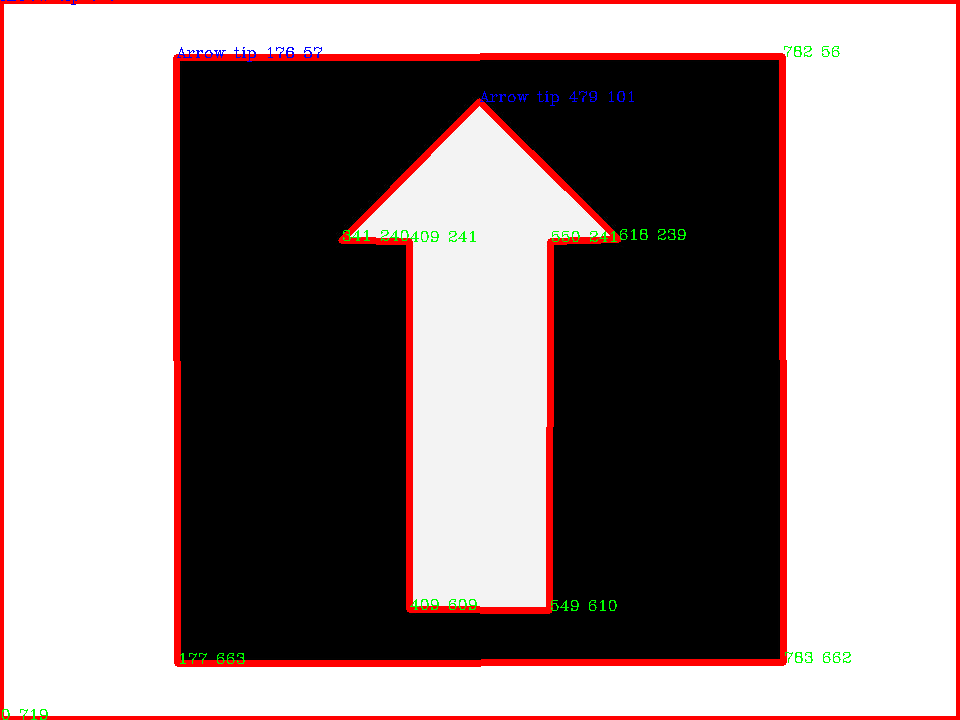

In [ ]:
cv2_imshow(image)

In [ ]:
contours,_=cv2.findcontour(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# for cnt in contours :
for cnt in largest_item :

    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)


    cv2.drawContours(original_image, [approx], 0, (0, 0, 255), 5)


    n = approx.ravel()
    i = 0

    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]


            string = str(x) + " " + str(y)

            if(i == 0):

                cv2.putText(original_image, "Arrow tip"+" "+string, (x, y),
                                font, 0.5, (255, 0, 0))
            else:

                cv2.putText(original_image, string, (x, y),
                          font, 0.5, (0, 255, 0))
        i = i + 1

In [ ]:
print(n[0])
print(n[1])
print(n[2])
print(n[3])
slope=(n[1]-n[3])/(n[0]-n[2])
import math
print(math.degrees(math.atan(slope)) )
print(slope)

301
43


IndexError: ignored

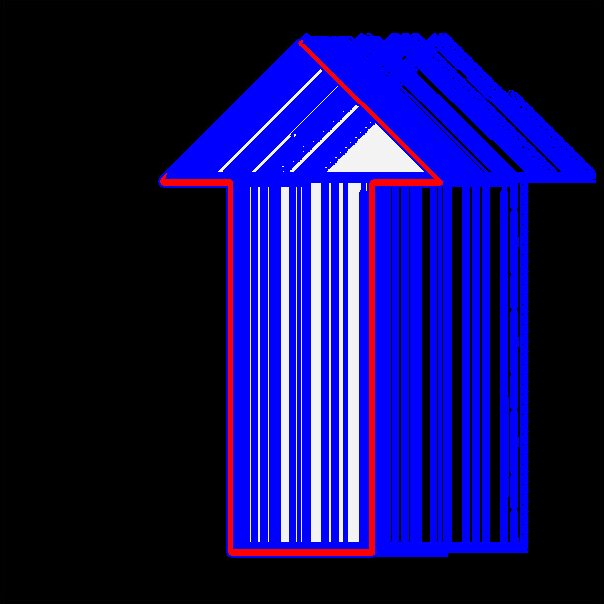

In [ ]:
cv2_imshow(image)

In [ ]:


lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)

arrow_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]

    if x1 == x2:
        continue
    slope = (y2 - y1) / (x2 - x1)

    if abs(slope) > 1:
        continue

    length = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    if length < 50:
        continue
    arrow_lines.append(line)


if arrow_lines:

    points = np.array([[x1, y1] for line in arrow_lines for x1, y1, x2, y2 in line])
    centroid = np.mean(points, axis=0).astype(np.int)

    angles = np.array([np.arctan2(y2 - y1, x2 - x1) for line in arrow_lines for x1, y1, x2, y2 in line])
    orientation = np.mean(angles)
    print(orientation)
    print(f'Orientation angle: {orientation * 180 / np.pi:.2f} degrees')

angle= (orientation * 180 / np.pi)
if(-20 < angle and angle <20):
  print("Up")
elif(-20 < angle and angle <-110):
  print("Left")
elif(20 < angle and angle <110):
  print("Right")

0.2617993877991494
Orientation angle: 15.00 degrees
Up


<ipython-input-105-e86433f9847d>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  centroid = np.mean(points, axis=0).astype(np.int)


In [ ]:
lines = cv2.HoughLines( img ,1,np.pi/180,130)

left = [0, 0]
right = [0, 0]
up = [0, 0]
down = [0, 0]

for object in lines:
    theta = object[0][1]
    rho = object[0][0]

    if ((np.round(theta, 2)) >= 0.7 and (np.round(theta, 2)) <= 1.3) or ((np.round(theta,2)) >= 1.8 and (np.round(theta,2)) <= 2.4):
        if (rho >= 20 and rho <= 80):
            left[0] += 1
        # elif (rho >= 60 and rho <= 65):
        #     left[1] +=1
        elif (rho >= -73 and rho <= -57):
            right[0] +=1
        elif (rho >=148 and rho <= 176):
            right[1] +=1
    elif ((np.round(theta, 2)) >= 0.2 and (np.round(theta,2)) <= 0.6) or ((np.round(theta, 2)) >= 1.2 and (np.round(theta,2))<= 1.7):
        if (rho >= -63 and rho <= -15):
            up[0] += 1
        elif (rho >= 67 and rho <= 74):
            down[1] += 1
            up[1] += 1
        elif (rho >= 160 and rho <= 191):
            down[0] += 1
print(rho,theta)
if left[0] >= 1 and left[1] >= 1:
    print("left")
elif right[0] >= 1 and right[1] >= 1:
    print("right")
elif up[0] >= 1 and up[1] >= 1:
    print("up")
elif down[0] >= 1 and down[1] >= 1:
    print("down")

print(up, down, left, right)

182.0 1.5707964
[0, 0] [1, 0] [0, 0] [0, 0]


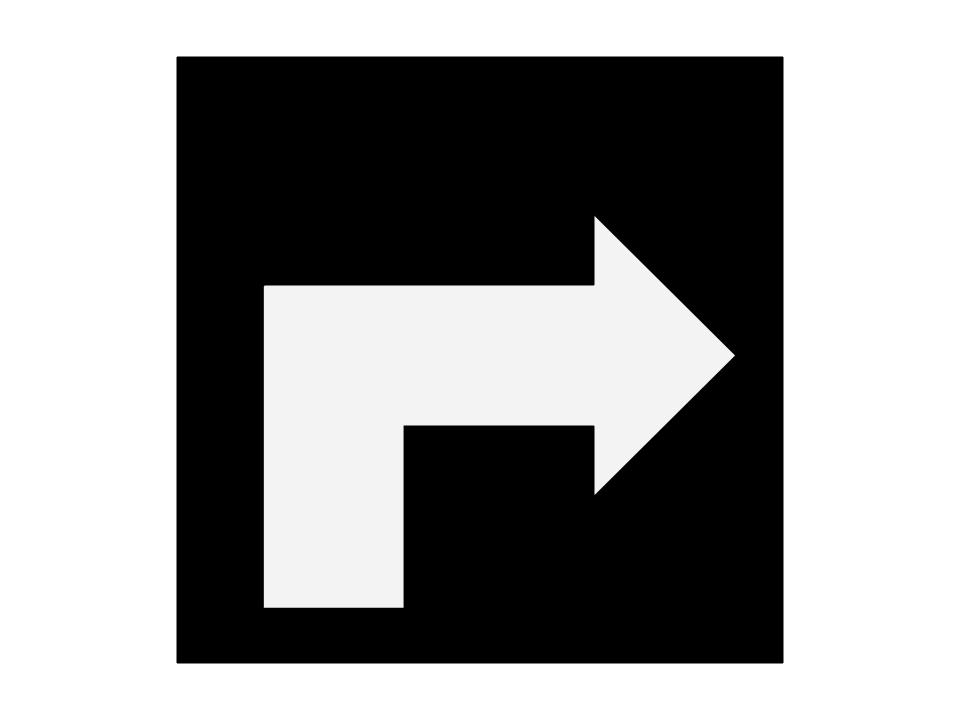

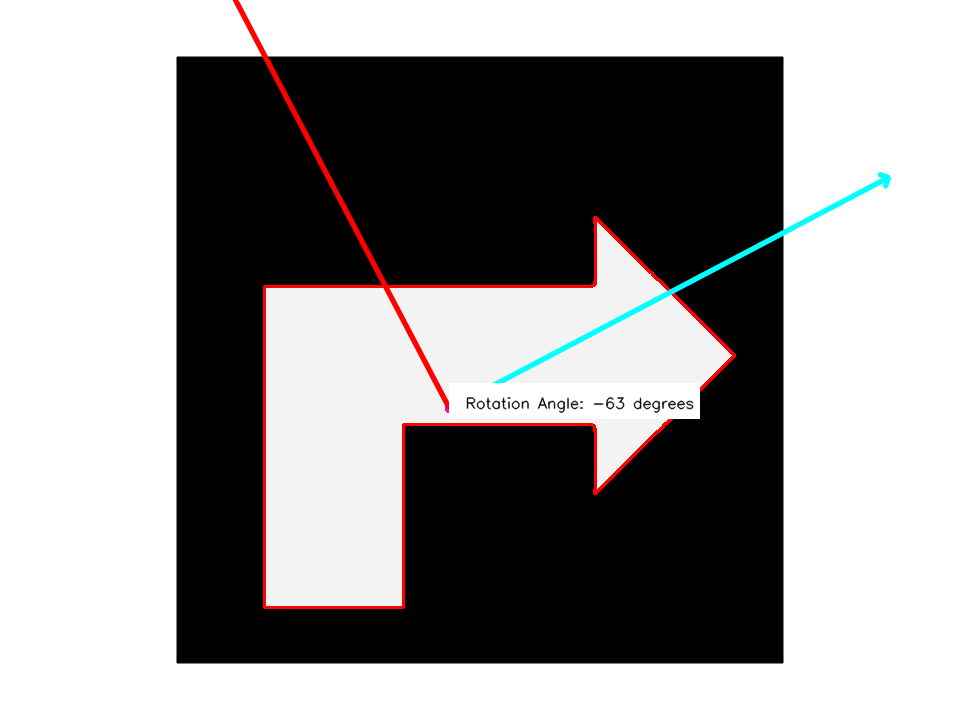

True

In [ ]:
import cv2 as cv
from math import atan2, cos, sin, sqrt, pi
import numpy as np

def drawAxis(img, p_, q_, color, scale):
  p = list(p_)
  q = list(q_)

  ## [visualization1]
  angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
  hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

  # Here we lengthen the arrow by a factor of scale
  q[0] = p[0] - scale * hypotenuse * cos(angle)
  q[1] = p[1] - scale * hypotenuse * sin(angle)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)

  # create the arrow hooks
  p[0] = q[0] + 9 * cos(angle + pi / 4)
  p[1] = q[1] + 9 * sin(angle + pi / 4)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)

  p[0] = q[0] + 9 * cos(angle - pi / 4)
  p[1] = q[1] + 9 * sin(angle - pi / 4)
  cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv.LINE_AA)
  ## [visualization1]

def getOrientation(pts, img):
  ## [pca]
  # Construct a buffer used by the pca analysis
  sz = len(pts)
  data_pts = np.empty((sz, 2), dtype=np.float64)
  for i in range(data_pts.shape[0]):
    data_pts[i,0] = pts[i,0,0]
    data_pts[i,1] = pts[i,0,1]

  # Perform PCA analysis
  mean = np.empty((0))
  mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)


  cntr = (int(mean[0,0]), int(mean[0,1]))



  cv.circle(img, cntr, 3, (255, 0, 255), 2)
  p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
  p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
  drawAxis(img, cntr, p1, (255, 255, 0), 1)
  drawAxis(img, cntr, p2, (0, 0, 255), 5)

  angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
  ## [visualization]


  label = "  Rotation Angle: " + str(-int(np.rad2deg(angle)) - 90) + " degrees"
  textbox = cv.rectangle(img, (cntr[0], cntr[1]-25), (cntr[0] + 250, cntr[1] + 10), (255,255,255), -1)
  cv.putText(img, label, (cntr[0], cntr[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)

  return angle

# Load the image
img = cv.imread("/content/Marathon Markers Right.jpg")

# Was the image there?
if img is None:
  print("Error: File not found")
  exit(0)

cv2_imshow( img)


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

for i, c in enumerate(contours):


  area = cv.contourArea(c)


  cv.drawContours(img, contours, i, (0, 0, 255), 2)

  # Find the orientation of each shape
  getOrientation(c, img)

cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

# Save the output image to the current directory
cv.imwrite("output_img.jpg", img)